# Variables Aleatorias Discretas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> Habiendo estudiado el repaso de teoría de probabilidad, empezaremos por estudiar variables aleatorias discretas.


> **Objetivos:**
> - Repasar la definición de variables aleatorias discretas.
> - Repasar las variabels aleatorias de Bernoulli, binomial y geométricas, y los fenómenos que modelan.
> - Definir la función de masa de probabilidad y la función de distribución acumulada, usando tablas o fórmulas.
> - Definir el valor esperado (media) de una VA discreta.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_probability.pdf


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 0. Recap

- Un espacio muestral discreto $\Omega$ es un conjunto finito o enumerable de resultados $\Omega = \{\omega_1, \omega_2, \dots\}$.

- La probabilidad de un resultado $\omega$ es $p(\omega)$.

- Un evento $E$ es un subconjunto de $\Omega$. La probabilidad de un evento $E$ es $p(E) = \sum_{\omega \in E} p(\omega)$.

## 1. Variables aleatorias (VA) discretas

**Definición.** Sea $\Omega$ un espacio muestral discreto. Una VA discreta es una función

$$
X: \Omega \to \mathbb{R}.
$$


**Ejemplo.** Supongamos que jugamos con dos dados.

Al tirarlos, los resultados son:

$$
\Omega = \{(i,j): i,j=1, 2, \dots, 6\}.
$$

La función de probabilidad, si los dados son justos, es $p(i, j) = \frac{1}{36}$.

Supongamos que estamos en un juego, donde ganamos $500 si la suma de $i$ y $j$ es 7. Caso contrario perdemos $100. Podemos definir una VA discreta con esta función de pago:

$$
X(i,j) = \left\lbrace
\begin{array}{lc}
500  &  \text{if } i+j=7 \\ 
-100 &  \text{if } i+j\neq7
\end{array}
\right .
$$

![dice](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/2-Dice-Icon.svg/600px-2-Dice-Icon.svg.png)

**Definición.** La función de masa de probabilidad (pmf por sus siglas en inglés) de una VA discreta es la función $p(a) = p(X=a)$.

Es fácil notar que:

- $0 \leq p(a) \leq 1$.
- $a$ puede ser cualquier número. Si $a$ es un número que $X$ nunca toma, entonces $p(a)=0$.

**Ejemplo.** Consideramos el tiro de un solo dado. El dado está cargado, de modo que solo salen los valores $1$, $5$ y $6$, y de modo que la función de probabilidad sea:
$$
p(X) = \left\{\begin{array}{cc }0.3 & X=1 \\ 0.3 & X=5 \\ 0.4 & X=6\end{array}\right.
$$

In [1]:
# Importar scipy.stats
from scipy import stats

In [2]:
# Definir listas de valores de X y probabilidades asociadas
x = [1, 2, 3, 4, 5, 6]
p = [0.3, 0, 0, 0, 0.3, 0.4]
X = stats.rv_discrete(name='X', values=(x, p))

In [3]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Probabilidad')

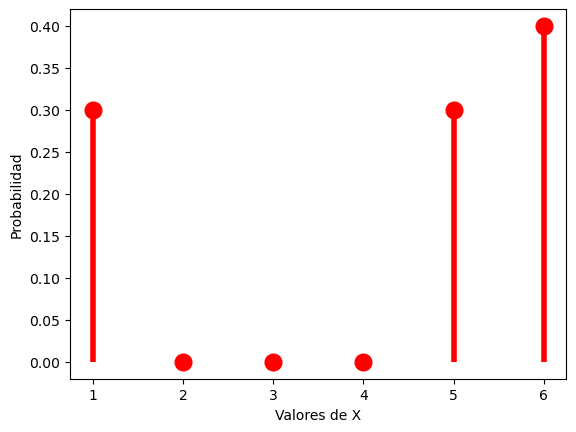

In [4]:
# Grafico
plt.plot(X.xk, X.pk, 'ro', ms=12)
plt.vlines(X.xk, 0, X.pk, colors='r', lw=4)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')

**Definición.** La función de distribución acumulada (cdf por sus siglas en inglés) de una VA discreta $X$ es la función $F$ dada por $F(a) = p(X \leq a)$.

**Ejemplo.** Considerando el ejemplo anterior, tenemos que:

|  x  |  1  |  2  |  3  |  4  |  5  |  6  |
| --- | --- | --- | --- | --- | --- | --- |
| p(x)| 0.3 |  0  |  0  |  0  | 0.3 | 0.4 |
| F(x)| 0.3 | 0.3 | 0.3 | 0.3 | 0.6 |  1  |

**Propiedades:**

- $F$ es no decreciente. Es decir, su gráfica nunca decrece.
- $0 \leq F(a) \leq 1$.
- $\lim_{a \to \infty} F(a) = 1$.
- $\lim_{a \to -\infty} F(a) = 0$.

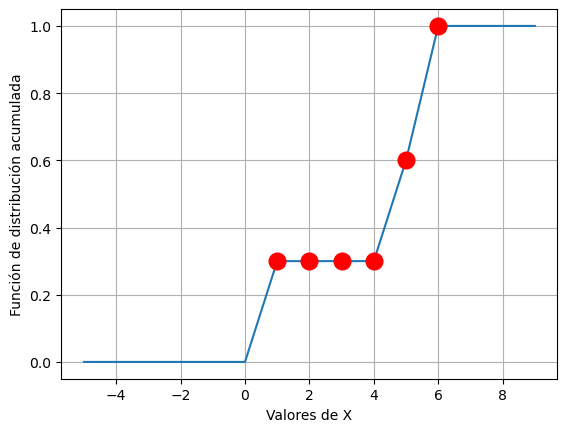

In [5]:
# Grafico
x = range(-5, 10)
plt.plot(x, X.cdf(x))
plt.plot(X.xk, X.cdf(X.xk), 'ro', ms=12)
plt.xlabel('Valores de X')
plt.ylabel('Función de distribución acumulada')
plt.grid()

In [6]:
import numpy as np

In [7]:
X.cdf(np.inf)

1.0

## 2. Distribuciones específicas

### 2.1. Distribución de Bernoulli

La distribución de Bernoulli modela una ejecución de un experimento con dos posibles resultados, normalmente denominados éxito y fracaso. Es una de las distribuciones más importantes, y a la vez la más simple.

Decimos que una VA $X$ sigue una distribución de Bernoulli con parámtro $p$ si:

- $X$ solo puede tomar los valores $0$ y $1$.
- $p(X=1) = p$ y $p(X=0)=1-p$.

Denotamos esto como $X \sim \text{Bernoulli}(p)$.

**Ejemplos.** Con la distribución de Bernoulli se pueden modelar los siguientes fenómenos.

- Tiro de una moneda. $p$ es la proporción de veces que cae cara.
- Votos a favor de una propuesta. $p$ es la proporción de votos a favor de la propuesta.
- En un clasificador binario, normalmente la salida la modelamos con una VA de Bernoulli, con parámetro desconocido.

In [8]:
X = stats.bernoulli(p=0.8)

Text(0, 0.5, 'Probabilidad')

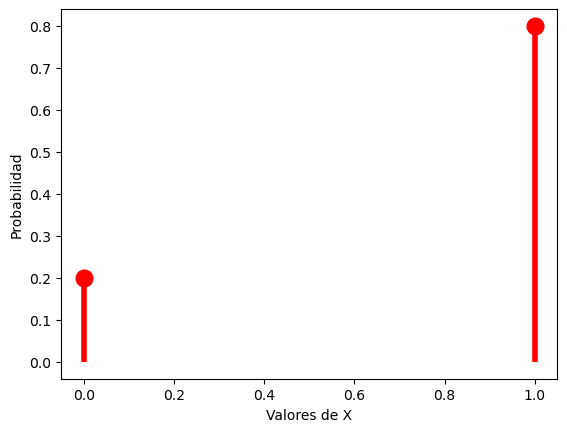

In [9]:
# Grafico
x = range(2)
plt.plot(x, X.pmf(x), 'ro', ms=12)
plt.vlines(x, 0, X.pmf(x), colors='r', lw=4)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')

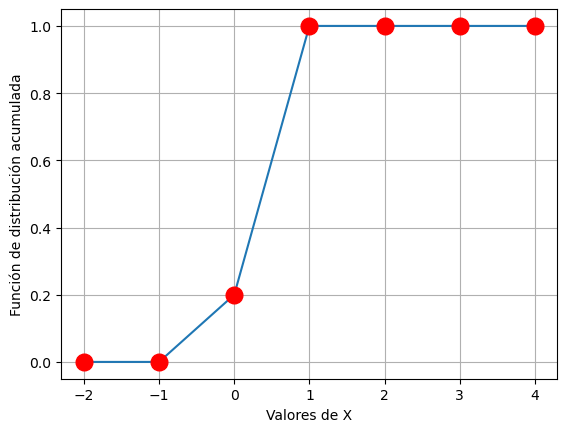

In [10]:
# Grafico
x = range(-2, 5)
plt.plot(x, X.cdf(x))
plt.plot(x, X.cdf(x), 'ro', ms=12)
plt.xlabel('Valores de X')
plt.ylabel('Función de distribución acumulada')
plt.grid()

### 2.2. Distribución Binomial

La distribución binomial, $\text{Binomial}(n, p)$, modela el número de éxitos en $n$ tiros independientes de un experimento $\text{Bernoulli}(p)$.

Es decir, un solo experimento de Bernoulli corresponde, por ejemplo, al tiro de una moneda. Un solo experimento Binomial consiste de $n$ experimentos de Bernoulli.

El espacio de resultados de Bernoulli es $\{0, 1\}$. El espacio de resultados de Binomial son secuencias de longitud $n$ de ceros y/o unos.

Mientras que una VA de Bernoulli puede tomar valores $0$ o $1$, una VA binomial puede tomar valores $0, 1, \dots, n$.

Denotamos esto como $X \sim \text{Binomial}(n, p)$.

La pmf de una distribución binomial es:

$$
p(a) = \left(\begin{array}{c}n \\ a \end{array}\right) p^a (1 - p)^{n-a}
$$

Si hacemos $n=1$, $\text{Binomial}(1, p) = \text{Bernoulli}(p)$.

**Ejemplo.** Grafiquemos algunas distribuciones binomiales:

In [11]:
X = stats.binom(n=1, p=0.8)

Text(0, 0.5, 'Probabilidad')

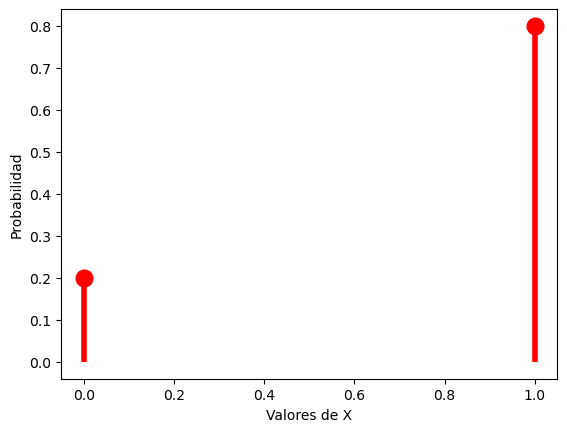

In [12]:
# Grafico
x = range(2)
plt.plot(x, X.pmf(x), 'ro', ms=12)
plt.vlines(x, 0, X.pmf(x), colors='r', lw=4)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')

In [15]:
Y = stats.binom(n=10, p=0.3)

Text(0, 0.5, 'Probabilidad')

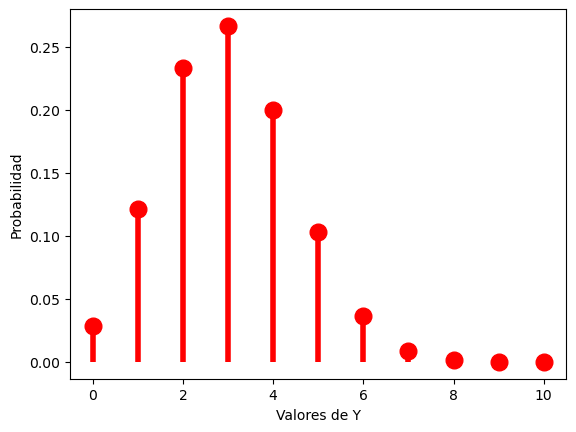

In [16]:
# Grafico
x = range(11)
plt.plot(x, Y.pmf(x), 'ro', ms=12)
plt.vlines(x, 0, Y.pmf(x), colors='r', lw=4)
plt.xlabel('Valores de Y')
plt.ylabel('Probabilidad')

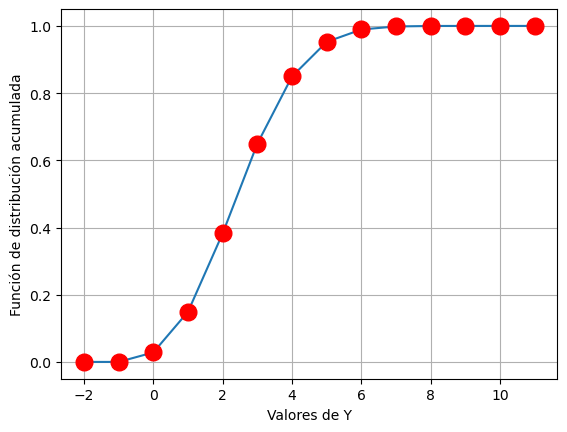

In [17]:
# Grafico
x = range(-2, 12)
plt.plot(x, Y.cdf(x))
plt.plot(x, Y.cdf(x), 'ro', ms=12)
plt.xlabel('Valores de Y')
plt.ylabel('Función de distribución acumulada')
plt.grid()

### 2.3. Distribución geométrica.

La distribución geométrica modela el número de fracasos antes del primer éxito en una secuencia de experimentos de Bernoulli.

La VA $X$ sigue una distribución geométrica con parámetro $p$ si,

- $X$ toma los valores $0, 1, 2, \dots$
- Su pmf está dada por $p(a) = p (1 - p)^{a}$.

La denotamos como $Geom(p)$.

**Ejemplo.** Grafiquemos algunas distribuciones geométricas:

In [24]:
X = stats.geom(p=0.1)
Y = stats.geom(p=0.9)

Text(0, 0.5, 'Probabilidad')

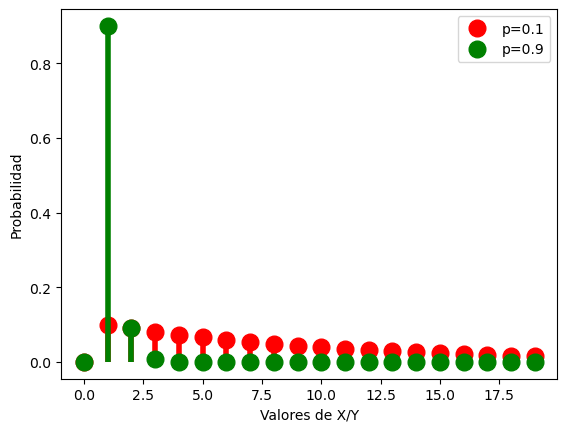

In [26]:
# Grafico
x = range(20)
plt.plot(x, X.pmf(x), 'ro', ms=12, label='p=0.1')
plt.vlines(x, 0, X.pmf(x), colors='r', lw=4)
plt.plot(x, Y.pmf(x), 'go', ms=12, label='p=0.9')
plt.vlines(x, 0, Y.pmf(x), colors='g', lw=4)
plt.legend()
plt.xlabel('Valores de X/Y')
plt.ylabel('Probabilidad')

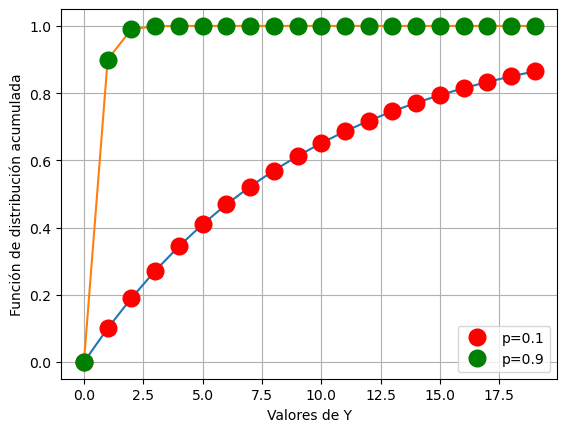

In [29]:
# Grafico
x = range(0, 20)
plt.plot(x, X.cdf(x))
plt.plot(x, X.cdf(x), 'ro', ms=12, label='p=0.1')
plt.plot(x, Y.cdf(x))
plt.plot(x, Y.cdf(x), 'go', ms=12, label='p=0.9')
plt.xlabel('Valores de Y')
plt.ylabel('Función de distribución acumulada')
plt.legend()
plt.grid()

# 3. Valor esperado y varianza.

**Ejemplo.** Suponga que tiene un dado justo con cinco 3's y un 6. ¿Cuál esperaría que fuera el promedio de 6000 tiros?

> Tablero.

**Ejemplo.** Se tiran dos dados de seis caras. Si ganas $1000 si la suma es 2, y pierdes $100 de otro modo, ¿Cuánto esperas ganar en promedio por tiro?

> Tablero.

Una de las operaciones más importantes con probabilidades es la de encontrar promedios ponderados de funciones. El **valor esperado** de una función $f(x)$ respecto a una distribución $p(x)$, denotado por $\mathbb{E}_p[f]$, está dado por:

- Para una distribución discreta:
  
  $$
  \mathbb{E}_p[f] = \sum_x p(x)f(x).
  $$

Si queremos evaluar el Valor Esperado de la variable aleatoria como tal, tenemos que:

$$
\mathbb{E}_p[X] = \sum_x p(x)x.
$$

**Ejemplos.** Simular los promedios anteriores de forma numérica, y contrastarlos con el valor esperado.

In [31]:
# Primer caso
xk = [3, 6]
pk = [5/6, 1/6]
X = stats.rv_discrete(name='X', values=(xk, pk))
# Valor esperado teórico
E_X = X.expect()
E_X

3.5

In [38]:
np.array([1, 2, 3, 4]).cumsum() / np.arange(1, 5)

array([1. , 1.5, 2. , 2.5])

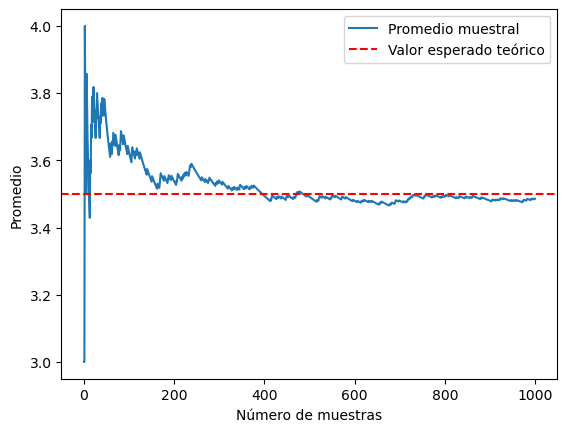

In [47]:
# Muestreamos la variable aleatoria
n_muestras = 1000
muestras = X.rvs(size=n_muestras)
# Obtenemos el promedio a medida que vamos obteniendo más muestras
promedios = muestras.cumsum() / np.arange(1, n_muestras + 1)
# Graficamos
plt.plot(promedios, label='Promedio muestral')
plt.axhline(y=E_X, c='r', ls='--', label='Valor esperado teórico')
plt.xlabel('Número de muestras')
plt.ylabel('Promedio')
plt.legend()

In [32]:
# Segundo caso
xk = [-100, 1000]
pk = [35/36, 1/36]
Y = stats.rv_discrete(name='X', values=(xk, pk))
# Valor esperado teórico
E_Y = Y.expect()
E_Y

-69.44444444444444

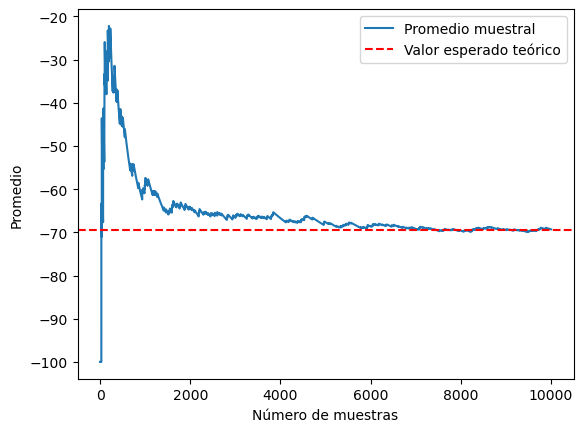

In [51]:
# Muestreamos la variable aleatoria
n_muestras = 10000
muestras = Y.rvs(size=n_muestras)
# Obtenemos el promedio a medida que vamos obteniendo más muestras
promedios = muestras.cumsum() / np.arange(1, n_muestras + 1)
# Graficamos
plt.plot(promedios, label='Promedio muestral')
plt.axhline(y=E_Y, c='r', ls='--', label='Valor esperado teórico')
plt.xlabel('Número de muestras')
plt.ylabel('Promedio')
plt.legend()

El valor esperado es una *medida de tendencia central*, en el sentido que nos da un valor hacia el cual tiende a agruparse los datos. Una medida de la variabilidad al rededor del valor esperado es **la varianza**, denotada por $\mathrm{var}_p[f]$, que está definida por:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[(f(x) - \mathbb{E}_p[f])^2] = \mathbb{E}_p[f(x)^2] - \mathbb{E}_p[f]^2.
$$

In [52]:
# Varianza en el primer caso (X toma valores entre 3 y 6 // Valor esperado es 3.5)
X.var()

1.25

In [53]:
# Varianza en el segundo caso (Y toma valores entre -100 y 1000 // Valor esperado es -69.44)
Y.var()

32677.46913580247

Si queremos una medida que nos de un sentido de dispersión en las "mismas unidades" de la variable aleatoria, podemos acudir a la desviación estándar, que se define como:

$$
\text{std}_p[f] = \sqrt{\text{var}_p[f]}
$$

In [54]:
# Desviación estándar en el primer caso (X toma valores entre 3 y 6 // Valor esperado es 3.5)
X.std()

1.118033988749895

In [55]:
# Desviación estándar en el segundo caso (Y toma valores entre -100 y 1000 // Valor esperado es -69.44)
Y.std()

180.76910448359936

# Anuncios parroquiales

### 1. Revisar la siguiente [app](https://mathlets.org/mathlets/probability-distributions/).
### 2. Ya pueden hacer el ejercicio 4 de la tarea.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>